<a href="https://colab.research.google.com/github/MonikSense/SensrGOSnO2/blob/main/rgosno2_GBRf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RMSE: 10.85 
Gradient Boosting - MSE: 117.79
Gradient Boosting - R2: 0.98
MAE: 7.26 


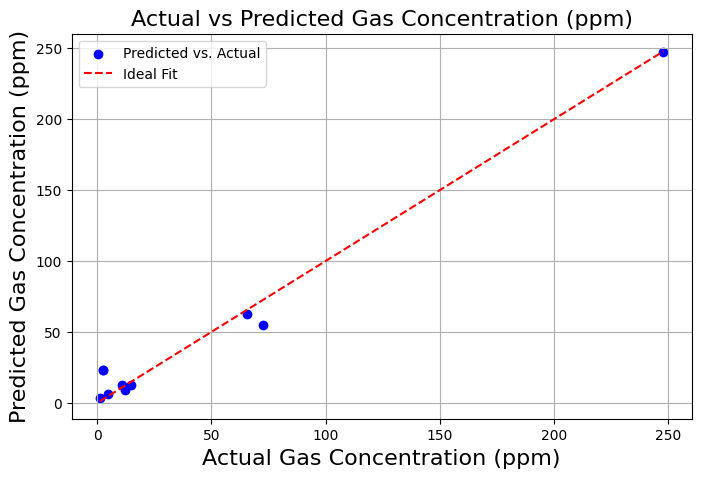

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/MonikSense/MonikSense/refs/heads/main/rgosno4%20final.CSV")

#OperTemp,Gas Conc (ppm),Sensor Response,Tres,Trec
# Features and target
X = data[['OperTemp', 'Gas Conc (ppm)','Tres','Trec']]
y = data['Sensor Response']
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
# Fit Random Forest Regressor model


# Fit Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=50, random_state=100)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse = np.sqrt(mse_gb)
print(f"RMSE: {rmse:.2f} ")
print(f"Gradient Boosting - MSE: {mse_gb:.2f}")
print(f"Gradient Boosting - R2: {r2_gb:.2f}")
print(f"MAE: {mae:.2f} ")
# Plot Actual vs Predicted Sensor Response
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gb, color='blue', label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Ideal Fit")
plt.xlabel("Actual Gas Concentration (ppm)", fontsize=16)
plt.ylabel("Predicted Gas Concentration (ppm)", fontsize=16)
plt.title("Actual vs Predicted Gas Concentration (ppm)", fontsize=16)
plt.legend()
plt.grid()
#plt.show()
